# Plot MNIST KDE

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sp
import load_MNIST as lm
import matplotlib
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = True

In [2]:
#load MNIST
N=10000
gmm_data = lm.MNIST_load(N)
y = gmm_data['y']
z = gmm_data['z']
K = gmm_data['K']
D = gmm_data['D']

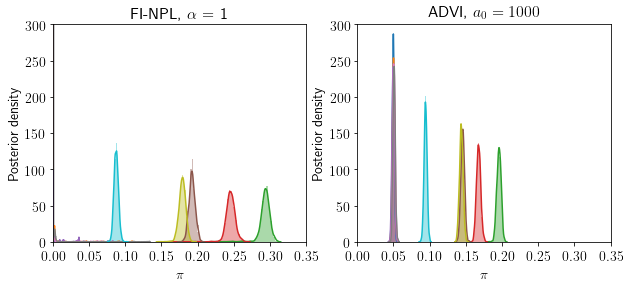

In [6]:
f= plt.figure(figsize = (10,4))

c= 1

par_bb =pd.read_pickle('parameters/par_bb_MNIST_c1_10000_B2000_seed100_VBinit')
pi_bb =np.array(par_bb['pi'])
mu_bb =np.array(par_bb['mu'])
sigma_bb = np.array(par_bb['sigma'])

plt.subplot(1,2,1)
for i in range(K):
    sns.distplot(pi_bb[:,i],label = '{}'.format(i+1));
plt.xlabel(r'$\pi$',fontsize = 14);
plt.xlim(0,0.35)
plt.ylim(0,300)
plt.ylabel('Posterior density',fontsize = 14)
plt.title(r'FI-NPL, $\alpha$ = {}'.format(c),fontsize = 16);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

par_advi = pd.read_pickle('./parameters/par_advi_MNIST_{}_alpha1000_seed104'.format(N))
pi_advi =par_advi.iloc[:,0:K]
mu_advi =par_advi.iloc[:,K: (K*(D+1))]
sigma_advi = par_advi.iloc[:,K*(D+1) : K*(2*D+1)]

plt.subplot(1,2,2)
for i in range(K):
    sns.distplot(pi_advi['pi[{}]'.format(i+1)],label = '{}'.format(i+1));

plt.xlabel(r'$\pi$',fontsize = 14);
plt.xlim(0,0.35)
plt.ylim(0,300)
plt.ylabel('Posterior density ',fontsize = 14)
plt.title(r'ADVI, $a_0 =1000$',fontsize = 16);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
